In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import knoxdata

# Scrape Data

Please dont execute these and create unnecissary load on knoxville's servers. The data is already available. The next section will download the latest data.

In [2]:
# knoxdata.get_and_write_crime_dataframes()

# Crime Dataset

Keep in mind this is quite large about `200Mb`. I includes 7 years of data from what I can tell. It could be possible to get more.

In [3]:
print('Loading dataset takes awhile if downloading over internet it is around 200Mb')

# crimes_df = pd.read_csv('../data/crime/crime.csv', index_col=0, parse_dates=['date', 'datetime'])
crimes_df = pd.read_csv('https://gitlab.com/costrouc/knoxville-opendata-notebooks/raw/master/data/crime/crime.csv', index_col=0, parse_dates=['date', 'datetime'])

Loading dataset takes awhile if downloading over internet it is around 200Mb


In [4]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848703 entries, C18077533 to 08-025215
Data columns (total 12 columns):
view174      848703 non-null int64
view175      848703 non-null int64
view177      848703 non-null int64
date         848703 non-null datetime64[ns]
crime        848703 non-null object
location     617736 non-null object
datetime     848703 non-null datetime64[ns]
longitude    848703 non-null float64
latitude     848703 non-null float64
agency       848703 non-null object
accuracy     848703 non-null object
address      841700 non-null object
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 84.2+ MB


In [5]:
# crimes per year
crimes_df.date.dt.year.value_counts()

2012    217572
2016    206036
2017    180916
2018     89773
2013     61222
2014     48620
2015     44564
Name: date, dtype: int64

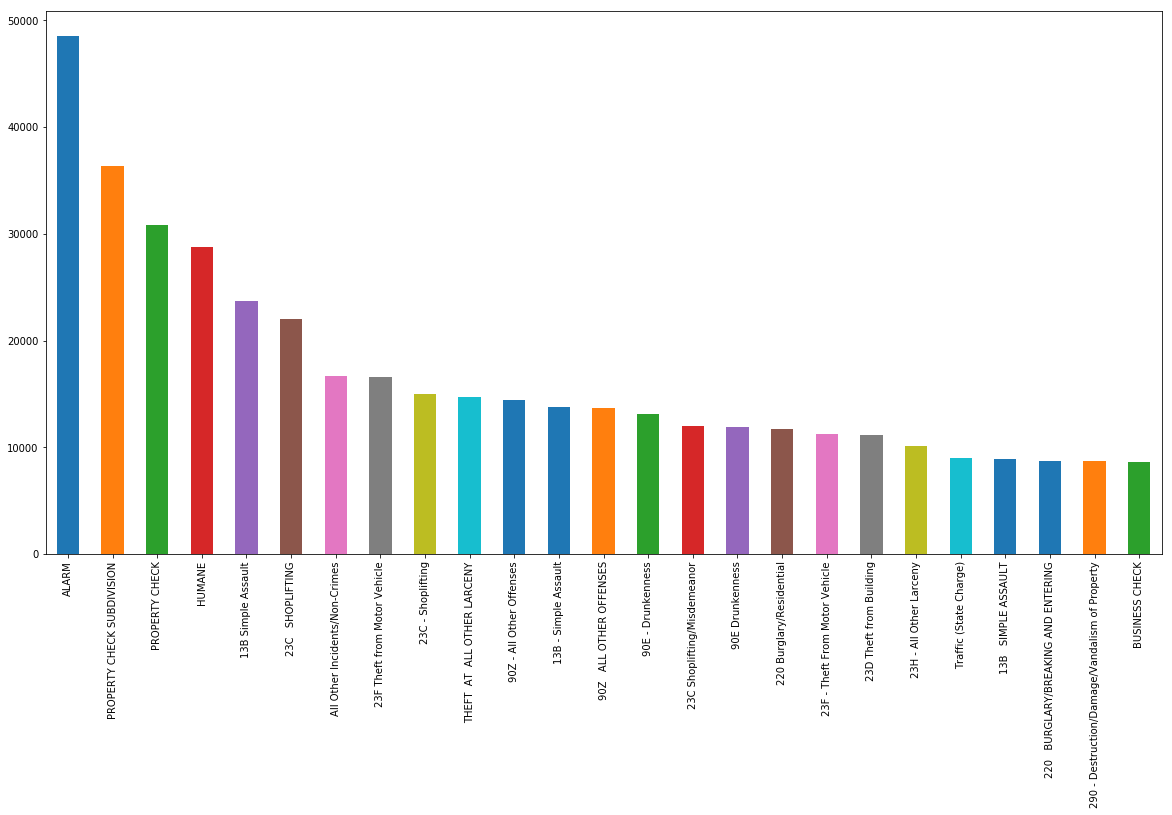

In [7]:
# 25 most common crimes
crimes_df.crime.value_counts()[:25].plot(kind='bar', figsize=(20, 10))

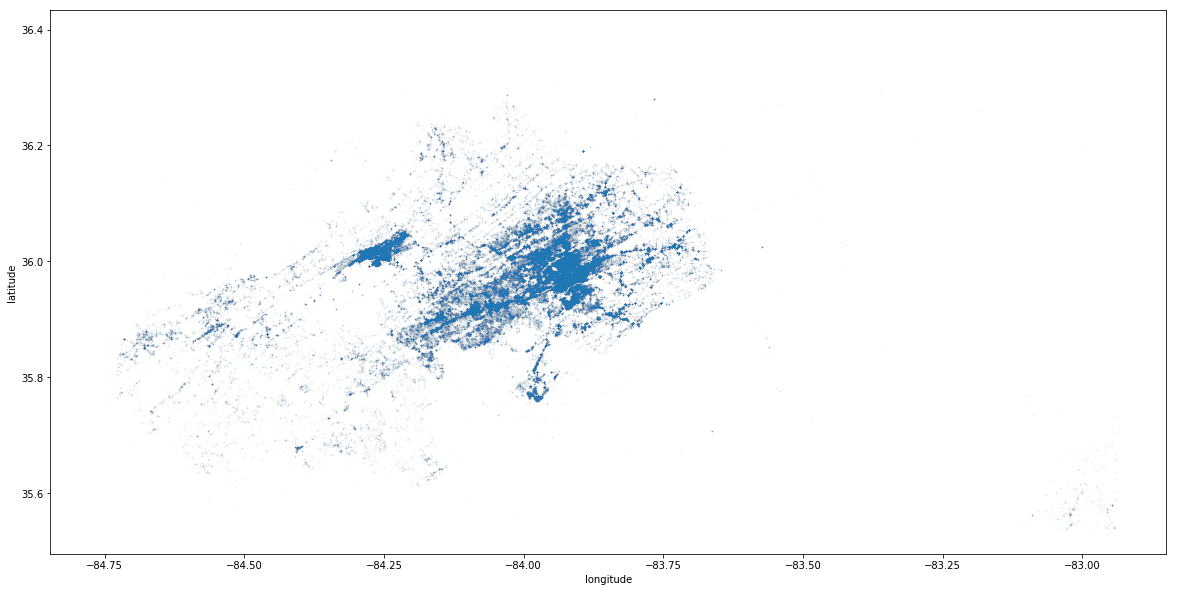

In [8]:
# crimes plot longitude and latitude
# crimes_df.plot.hexbin(x='longitude', y='latitude', gridsize=200, figsize=(20, 10))
crimes_df.plot.scatter(x='longitude', y='latitude', s=0.05, alpha=0.05, figsize=(20, 10))